In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv("placedata v2.0 synthetic.csv")
print(list(data.columns))
data.head()

['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'PlacementStatus']


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [4]:
lb = LabelEncoder()
data['PlacementStatus'] = lb.fit_transform(data['PlacementStatus'])
data['PlacementTraining'] = lb.fit_transform(data['PlacementTraining'])
data['ExtracurricularActivities'] = lb.fit_transform(data['ExtracurricularActivities'])
data = data.drop(['StudentID'], axis = 1)
outputs = data['PlacementStatus']
inputs = data.drop(['PlacementStatus'], axis = 1)
# std = StandardScaler()
# inputs = std.fit_transform(inputs)

In [5]:
data.isna().sum() # for checking nulls

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [6]:
data.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.585400,0.731800,69.159400,74.501500,0.419700
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.492677,0.443044,10.430459,8.919527,0.493534
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,0.000000,55.000000,57.000000,0.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,0.000000,59.000000,67.000000,0.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,1.000000,70.000000,73.000000,0.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,1.000000,78.000000,83.000000,1.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,1.000000,90.000000,88.000000,1.000000


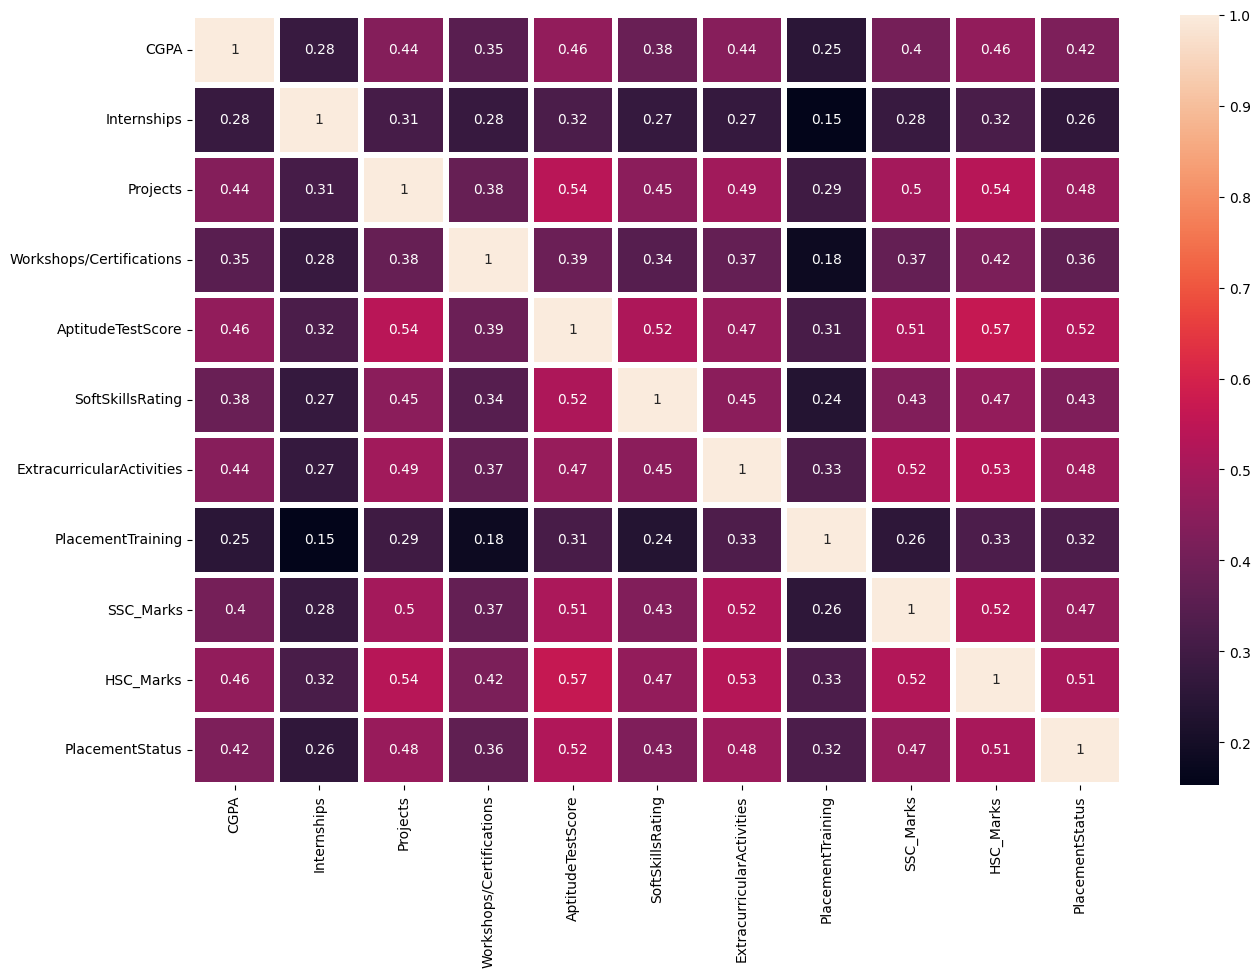

In [7]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),linewidths = 3, annot=True)
plt.show()

In [8]:
# Visualizating effect of internships on placement
Internships_effect = data.pivot_table(index = 'PlacementStatus',values="CGPA", columns='Internships', aggfunc='count')
Internships_effect

Internships,0,1,2
PlacementStatus,,,
0,1320,3733,750
1,663,1809,1725


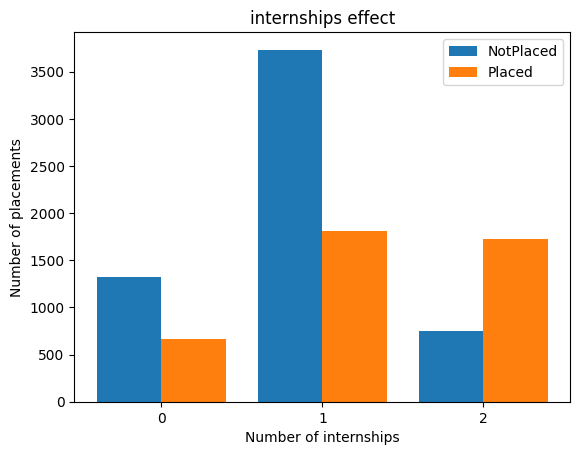

In [9]:
X = Internships_effect.columns
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Internships_effect.iloc[0,:], 0.4, label = 'NotPlaced')
plt.bar(X_axis + 0.2, Internships_effect.iloc[1,:], 0.4, label = 'Placed')

plt.xticks(X_axis, X)
plt.xlabel("Number of internships")
plt.ylabel("Number of placements")
plt.title("internships effect")
plt.legend()
plt.show()

In [10]:
data

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


In [11]:
# Effect of CGPA and softskills
CGPA_effect = data.pivot_table(index = 'PlacementStatus', values= ['CGPA', 'SoftSkillsRating'])
CGPA_effect
# Shows that higher cgpa and softskillsscore are more probable to land student a placement

,CGPA,SoftSkillsRating
PlacementStatus,,
0,7.467672,4.174393
1,8.016488,4.530760


In [12]:
# sns.pairplot(data)

Support vector
79.0


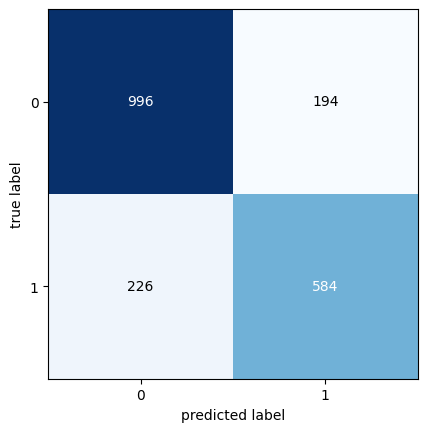



Logistic regression
78.35


C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


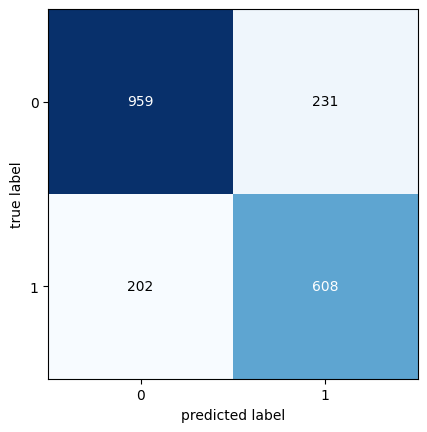



Random Forest
78.95


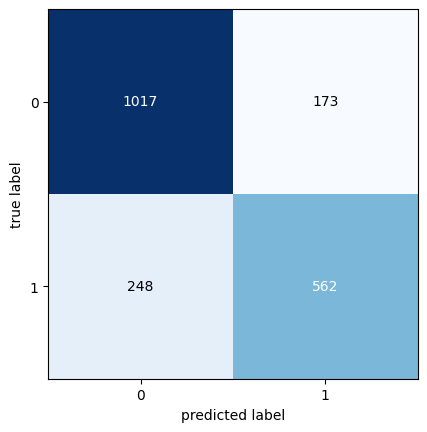



Decision Trees
77.9


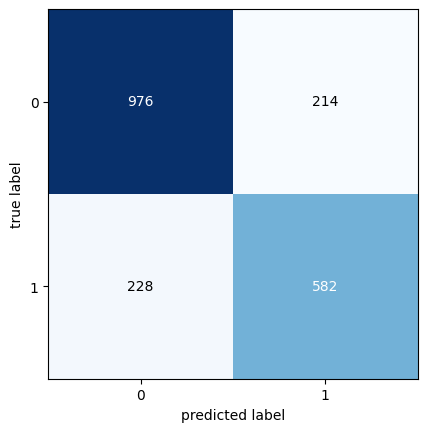



KNeighbourClassifier
77.05


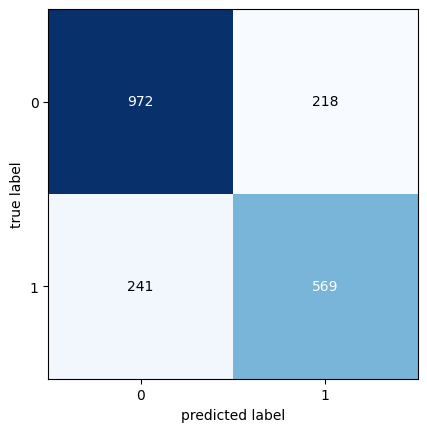



XGBoost
78.45


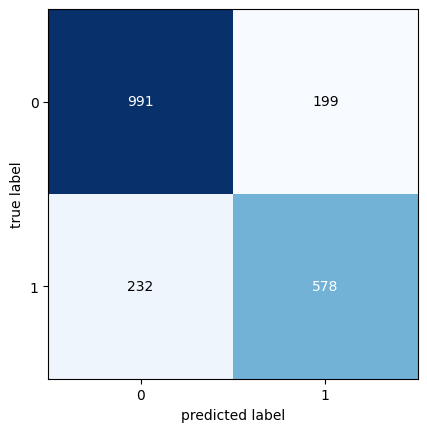



Adaboost
80.25


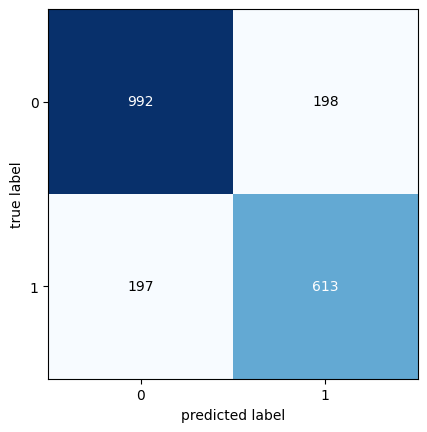



Gradient Boosting
78.4


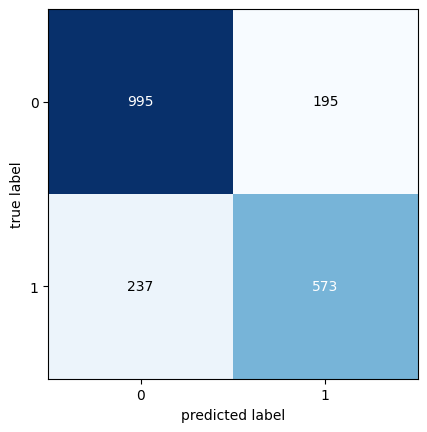

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 0)
models = [[SVC(), "Support vector"],
        [LogisticRegression(C=10), "Logistic regression"],
         [RandomForestClassifier(n_estimators = 20), "Random Forest"],
         [DecisionTreeClassifier(max_depth = 7), "Decision Trees"],
         [KNeighborsClassifier(n_neighbors = 7), "KNeighbourClassifier"],
         [xgb.XGBClassifier(objective="binary:logistic", random_state=42), "XGBoost"],
         [AdaBoostClassifier(n_estimators = 25), "Adaboost"],
         [GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=10, random_state=0), "Gradient Boosting"]]

for i in models:
    name = i[1]
    model = i[0]
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred) * 100)
    cnf = confusion_matrix(y_test,y_pred)
    fig, ax = plot_confusion_matrix(conf_mat = cnf)
    plt.show()
    print("\n")

In [14]:
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [85,89,90,91,95]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.799792 using {'learning_rate': 1.0, 'n_estimators': 90}


80.60000000000001


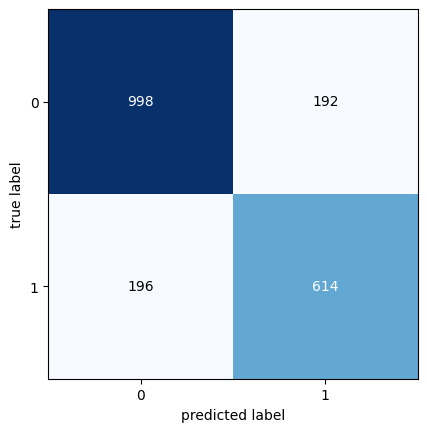

In [15]:
y_pred = grid_result.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)
cnf = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat = cnf)
plt.show()

In [16]:
a=[[6.5,1,1,0,84,3.9,0,1,75,71]]
# std = StandardScaler()
# a = std.fit_transform(a)
grid_result.predict(a)

C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
for i in models:
    name = i[1]
    model = i[0]
    print(name)
    # model.fit(X_train, y_train)
    y_pred = model.predict(a)
    print(y_pred)
    # print(accuracy_score(y_test, y_pred) * 100)
    # cnf = confusion_matrix(y_test,y_pred)
    # fig, ax = plot_confusion_matrix(conf_mat = cnf)
    # plt.show()
    print("\n")

Support vector
[0]


Logistic regression
[0]


Random Forest
[0]


Decision Trees
[0]


KNeighbourClassifier
[0]


XGBoost
[0]


Adaboost
[0]


Gradient Boosting
[0]




C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.w

In [18]:
X_test

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
9394,7.7,0,2,3,74,4.0,1,1,90,84
898,8.5,1,3,1,77,4.7,1,1,65,85
2398,6.7,1,1,1,69,4.0,0,0,55,67
5906,6.5,1,2,0,76,4.3,1,1,69,73
2343,7.5,1,2,0,65,3.5,0,0,55,63
...,...,...,...,...,...,...,...,...,...,...
1037,8.4,1,3,2,89,4.2,1,1,76,83
2899,8.6,1,1,2,87,3.9,1,1,84,84
9549,8.2,2,3,2,88,4.7,1,1,83,83
2740,8.4,2,3,0,86,4.7,1,1,84,83
